### **Problem Statement**


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

**Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### **Car Price Assignment Data Dictionary**


The following are the features that describe different attributes of cars, which might be used to predict car prices or analyze trends.

1. **car_ID** - Unique identifier for each car (numerical).
2. **symboling** - Insurance risk rating, a value from -3 to 3.
   - **-3 to -1**: Safe vehicles (lower risk).
   - **0**: Medium risk vehicles.
   - **1 to 3**: Risky vehicles (higher risk).
3. **CarName** - Name of the car as a string, including both brand and model.
4. **fueltype** - Type of fuel used by the car.
   - **gas**: Gasoline.
   - **diesel**: Diesel fuel.
5. **aspiration** - Type of air induction used by the engine.
   - **std**: Standard engine (normally aspirated).
   - **turbo**: Turbocharged engine for increased power.
6. **doornumber** - Number of doors the car has.
   - **two**: Two doors.
   - **four**: Four doors.
7. **carbody** - Body style of the car.
   - **convertible**: Open-top car.
   - **hatchback**: A rear door that opens upwards.
   - **sedan**: Standard closed car.
   - **wagon**: Car with extended back for storage.
   - **hardtop**: Fixed-roof car with no B-pillar.
8. **drivewheel** - The type of drive applied to the wheels.
   - **fwd**: Front-wheel drive.
   - **rwd**: Rear-wheel drive.
   - **4wd**: Four-wheel drive.
9. **enginelocation** - Location of the car’s engine.
   - **front**: Front-mounted engine.
   - **rear**: Rear-mounted engine.
10. **wheelbase** - The distance between the front and rear axles (in inches). Affects car stability.
11. **carlength** - Length of the car (in inches).
12. **carwidth** - Width of the car (in inches).
13. **carheight** - Height of the car (in inches).
14. **curbweight** - The weight of the car without passengers or cargo (in pounds).
15. **enginetype** - Type of engine.
    - **dohc**: Double overhead camshaft.
    - **ohcv**: Overhead valves with camshaft.
    - **ohc**: Overhead camshaft.
    - **rotor**: Rotary engine.
    - **dohcv**: Double overhead valves with camshaft.
    - **l**: Inline engine.
16. **cylindernumber** - Number of cylinders in the engine.
    - **two**, **three**, **four**, **five**, **six**, **eight**, **twelve**: Number of cylinders.
17. **enginesize** - Engine displacement (in cubic inches). Larger engines generally produce more power.
18. **fuelsystem** - Fuel system used in the car.
    - **mpfi**: Multi-point fuel injection.
    - **2bbl**: 2-barrel carburetor.
    - **mfi**: Multiport fuel injection.
    - **spdi**: Single-point direct injection.
    - **4bbl**: 4-barrel carburetor.
    - **idi**: Indirect fuel injection.
    - **spfi**: Single-point fuel injection.
19. **boreratio** - The ratio of the diameter of the cylinder bore to its stroke length.
20. **stroke** - The length of the piston movement in the cylinder (in inches).
21. **compressionratio** - The ratio of the cylinder's volume before and after the compression stroke.
22. **horsepower** - The power output of the engine (in horsepower).
23. **peakrpm** - The maximum revolutions per minute (RPM) the engine can achieve.
24. **citympg** - Fuel consumption in city driving conditions (miles per gallon).
25. **highwaympg** - Fuel consumption in highway driving conditions (miles per gallon).
26. **price** - The price of the car in U.S. dollars (target variable).

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV, LassoCV


In [ ]:
cars_df = pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Exploratory Data Analysis**

In [ ]:
cars_df.shape

(205, 26)

In [ ]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
# check null values count
cars_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
# check duplicates
cars_df.duplicated().sum()

0

In [ ]:
cars_df.drop(["car_ID", "CarName"], axis=1, inplace=True )

In [ ]:
# Get numeric cols
numeric_cols = cars_df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[numeric_cols !="price"]

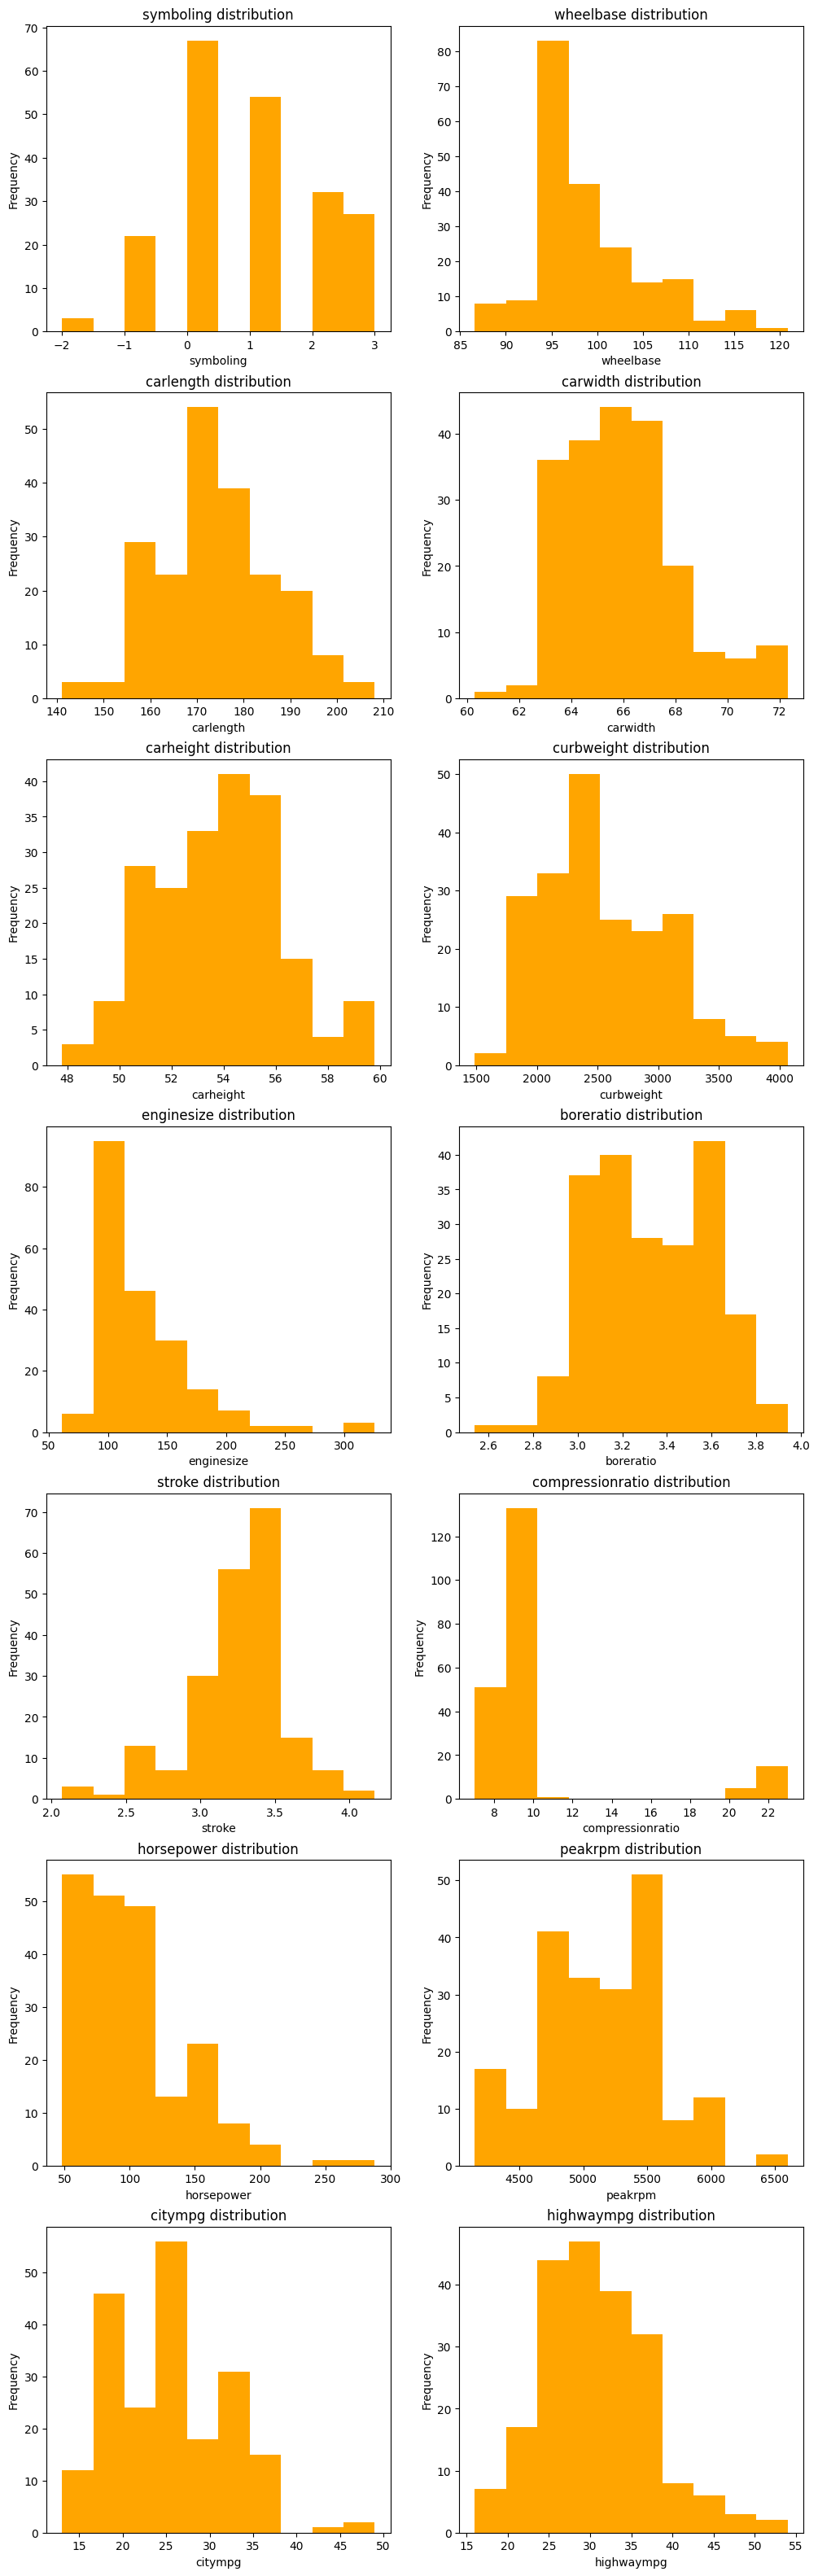

In [ ]:
# Histograms for Numerics features
i = 0
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12,40)) # (width, length)
for x in range(0,7):
  for y in range(0,2):
    ax[x,y].hist(cars_df[numeric_cols[i]], color='orange')
    ax[x,y].set(title=f"{numeric_cols[i]} distribution", xlabel=f"{numeric_cols[i]}", ylabel="Frequency")
    i = i+1

plt.show();


In [ ]:
categorical_cols = cars_df.select_dtypes(include=object).columns
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

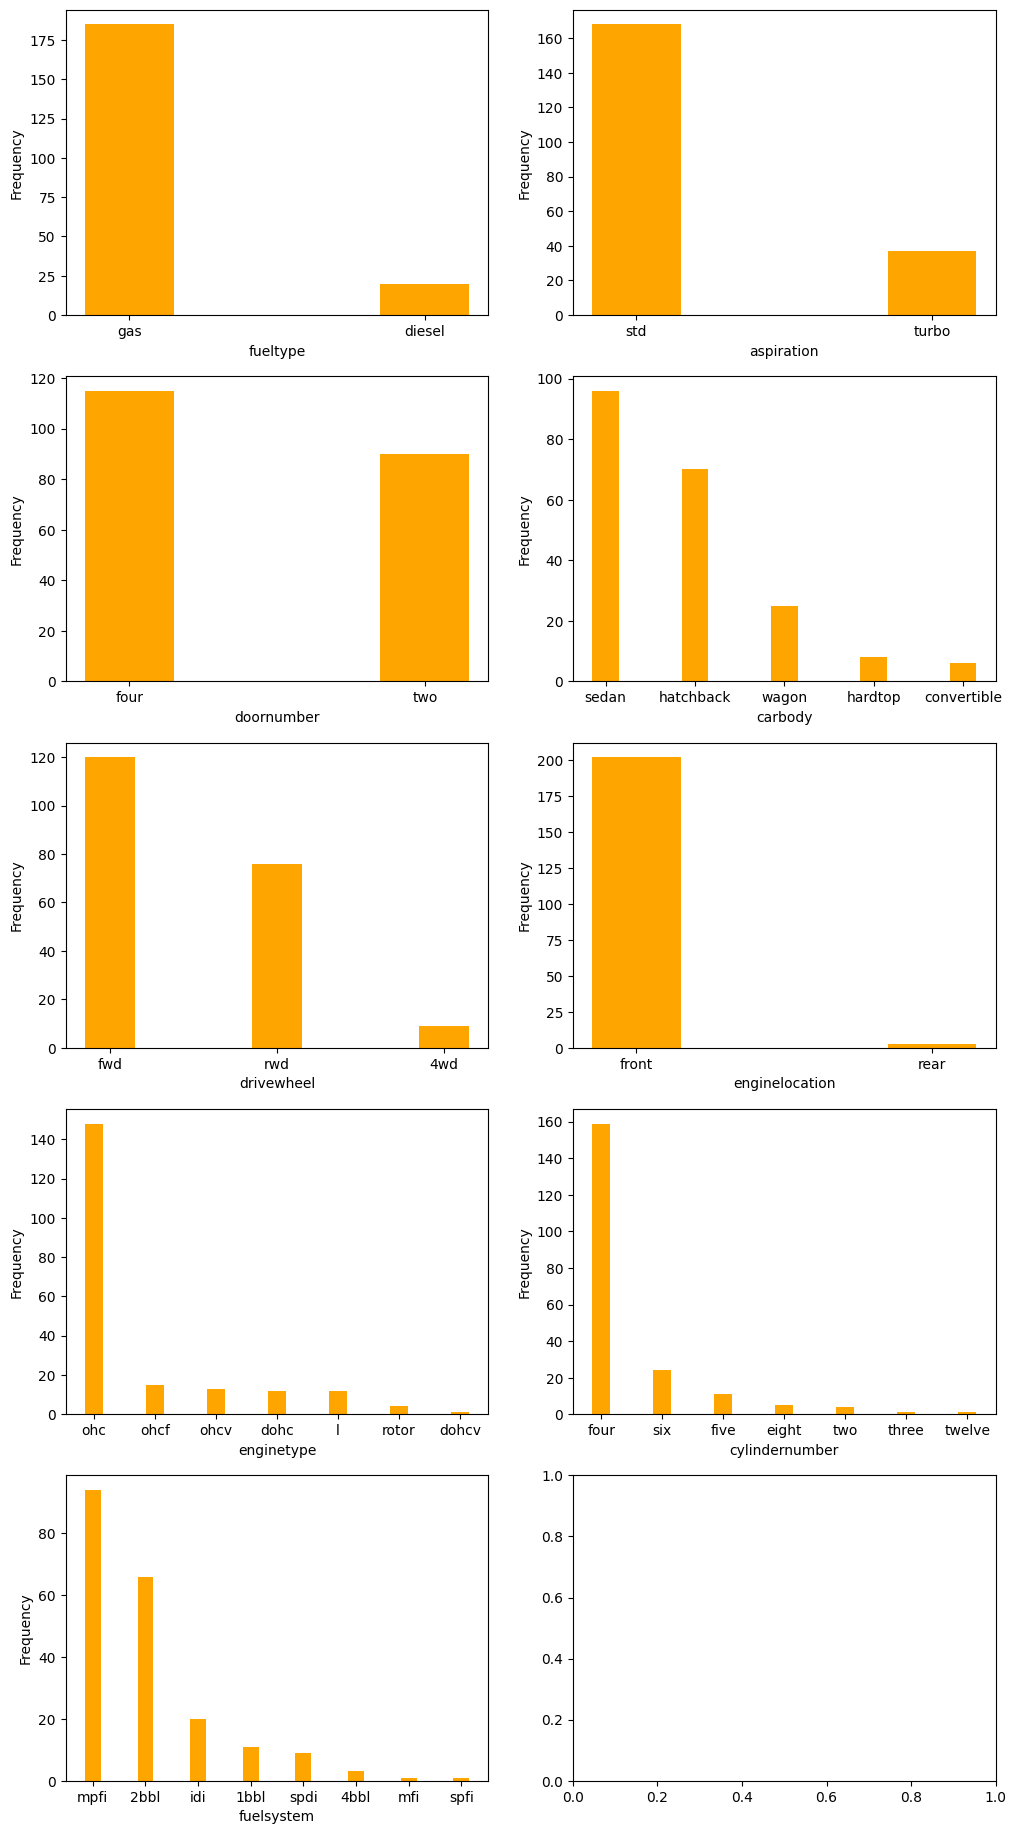

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,23))
j=0
for x in range(0,5):
  for y in range(0,2):
    ax[x,y].bar(cars_df[categorical_cols[j]].value_counts().index, cars_df[categorical_cols[j]].value_counts(), width=0.3, color='orange')
    ax[x,y].set(xlabel=f"{categorical_cols[j]}", ylabel="Frequency")
    j = j+1
    if j == 9:
      break
plt.show;

In [ ]:
numeric_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [ ]:
numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']

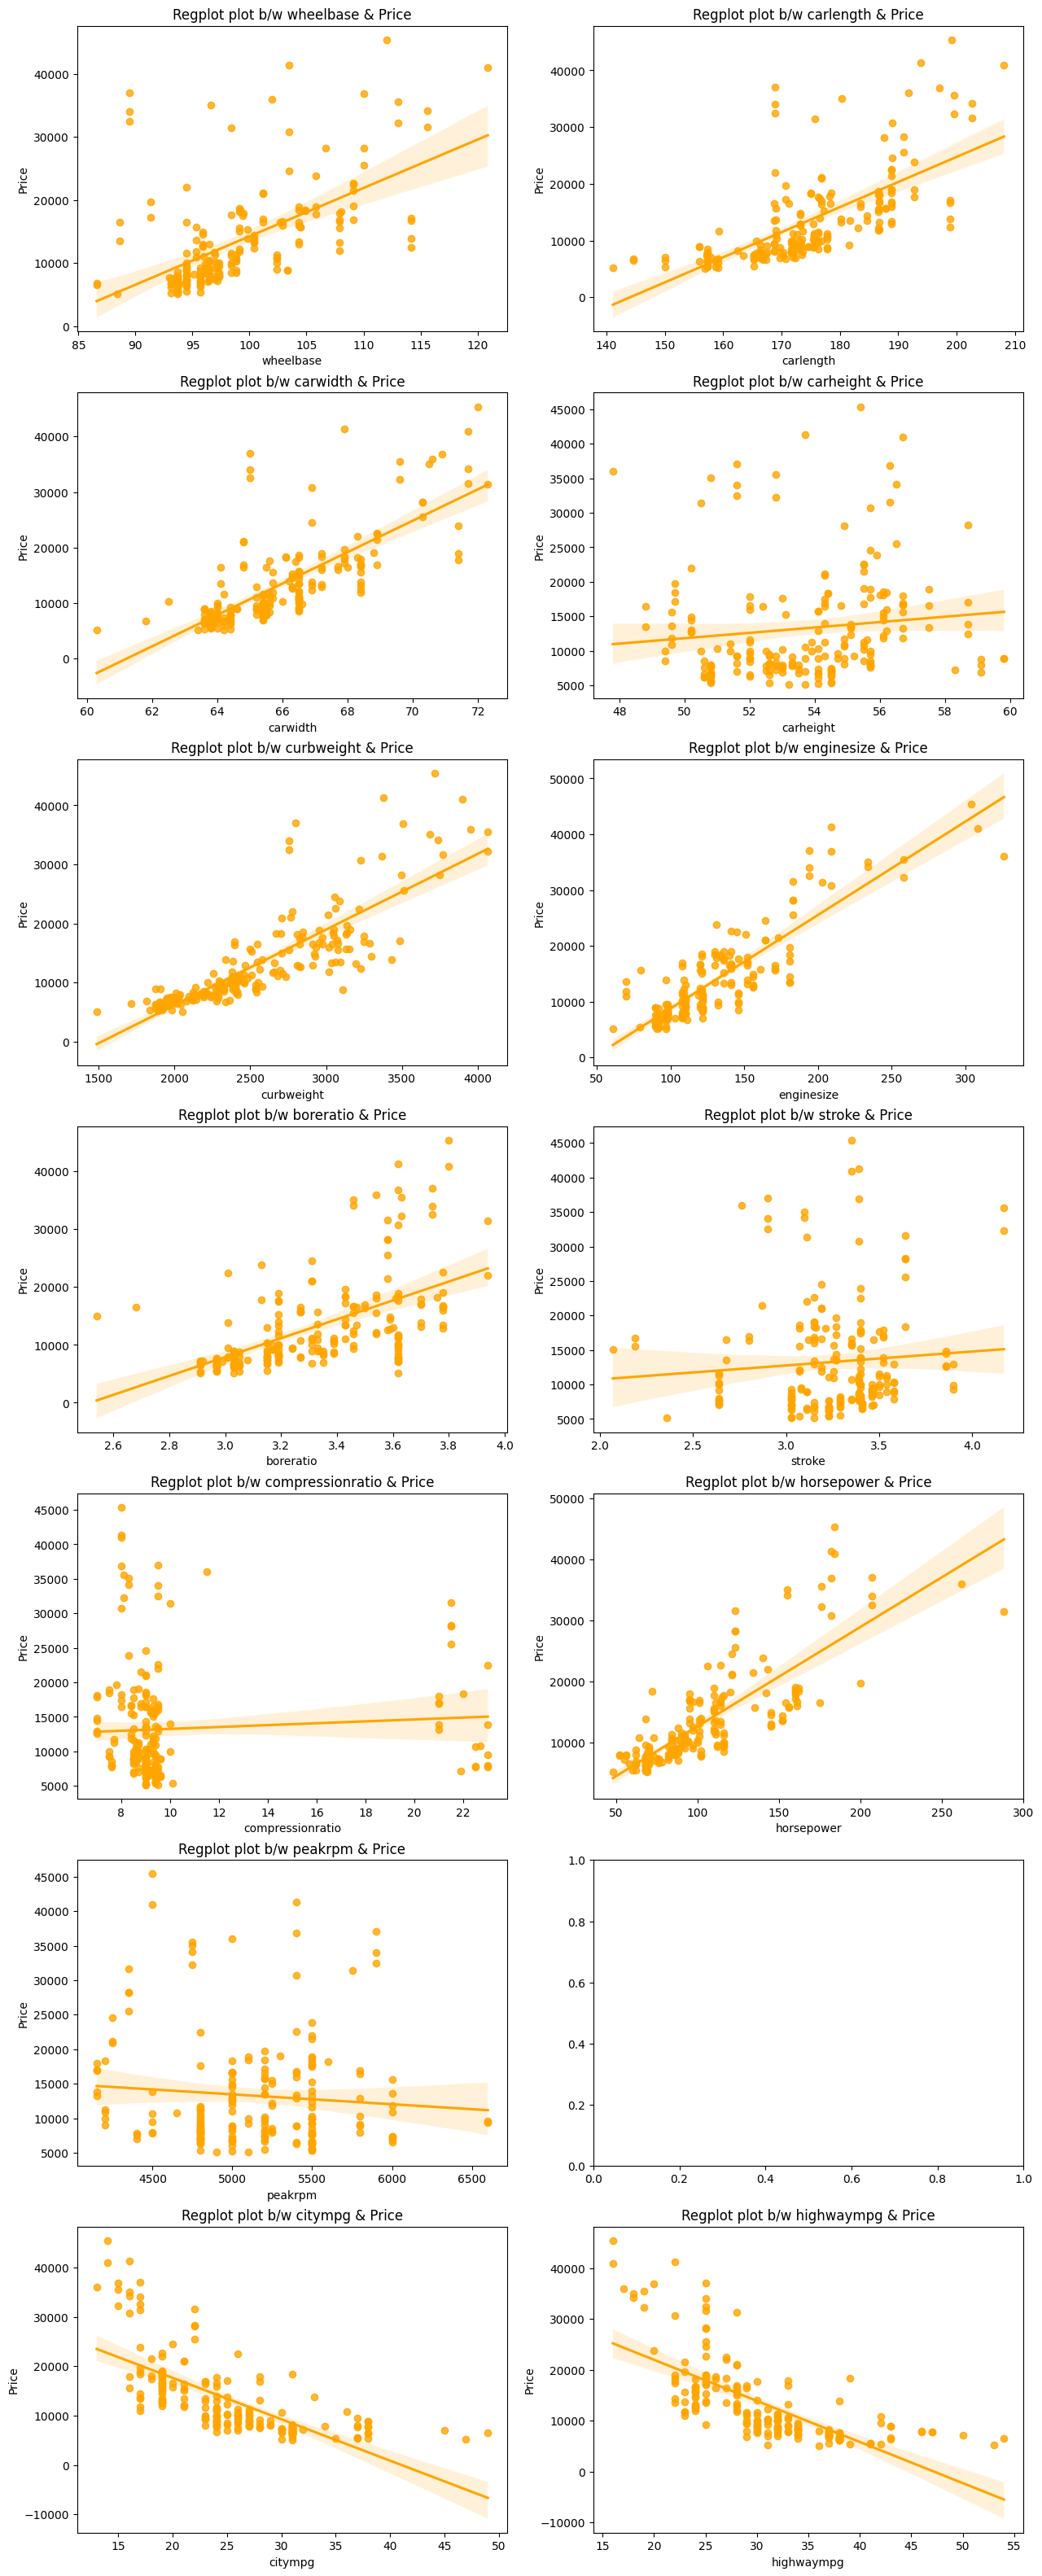

In [ ]:
# Bivariate Analysis
# regplot b/w numeric & Price column
i = 0
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,40))
for x in range(0,7):
  for y in range(0,2):
    sns.regplot(x=cars_df[numeric_cols[i]], y=cars_df["price"], color='orange', ax=ax[x,y])
    ax[x,y].set(title=f"Regplot plot b/w {numeric_cols[i]} & Price", xlabel=f"{numeric_cols[i]}", ylabel="Price")
    i = i+1
    if i == 11:
      break
plt.show();


In [ ]:
# Boxplot for Categorical features vs Price
categorical_features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']


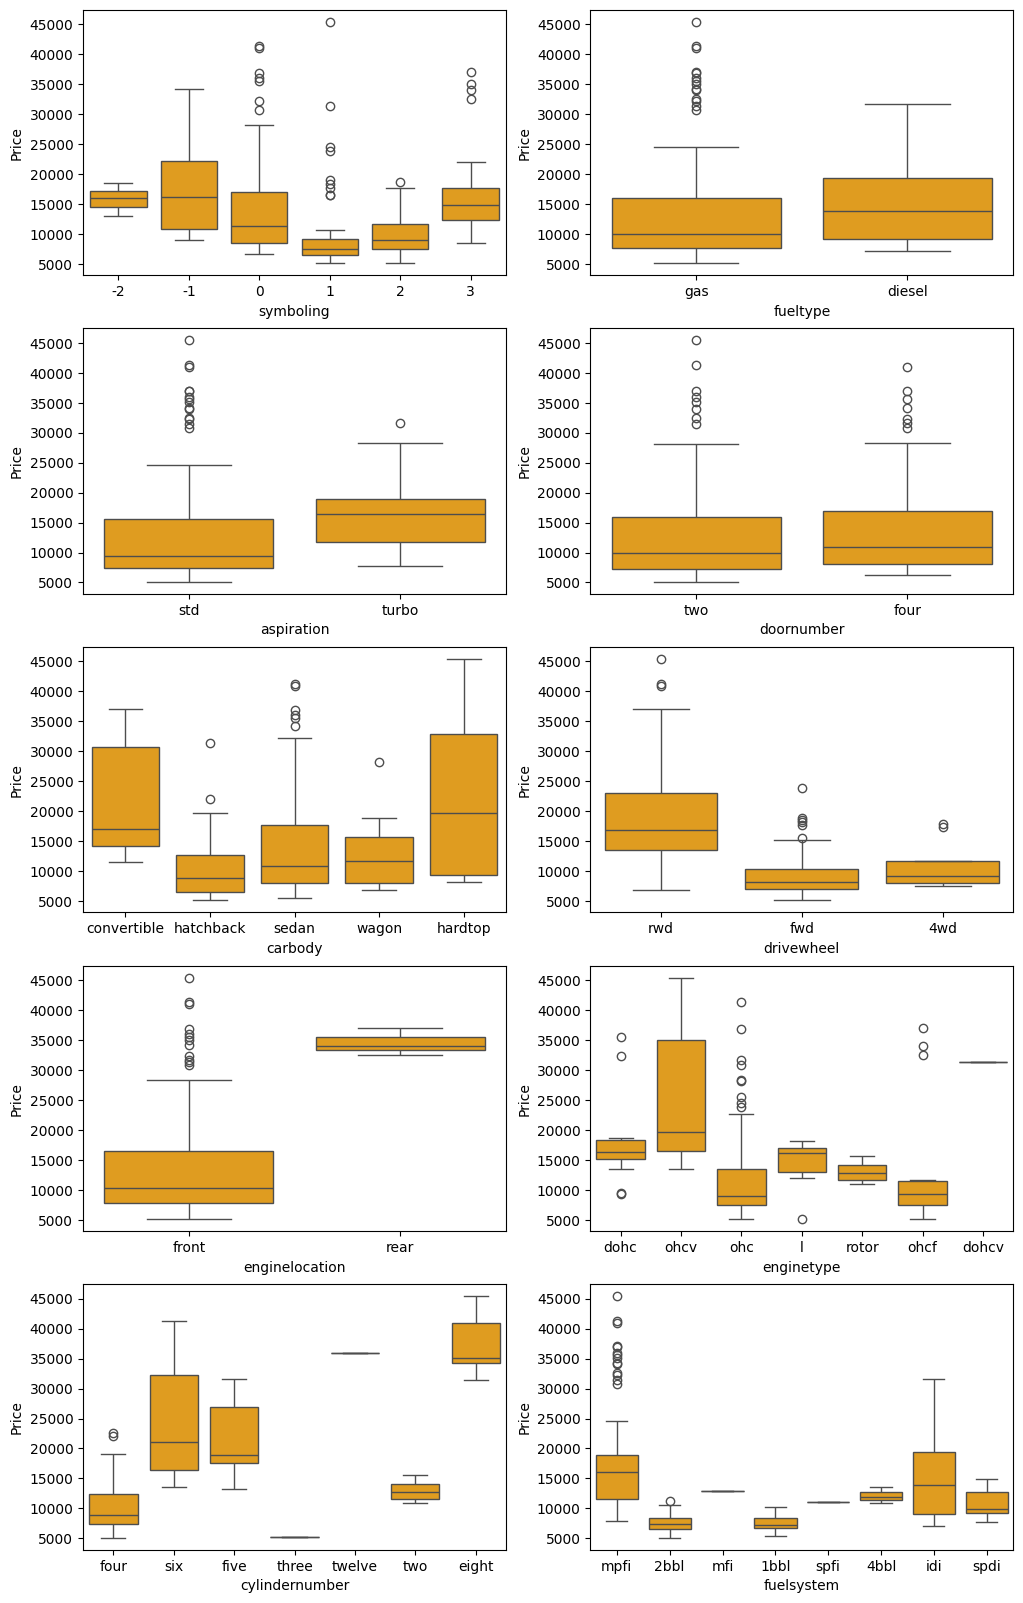

In [ ]:
j = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,20))
for x in range(0,5):
  for y in range(0,2):
    sns.boxplot(x=cars_df[categorical_features[j]], y=cars_df["price"], data = cars_df, ax=ax[x,y], color='orange')
    ax[x,y].set(xlabel=f"{categorical_features[j]}", ylabel="Price")
    j = j+1

plt.show();

<ipython-input-9-62185705d2d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['price'] = cars_df['price']


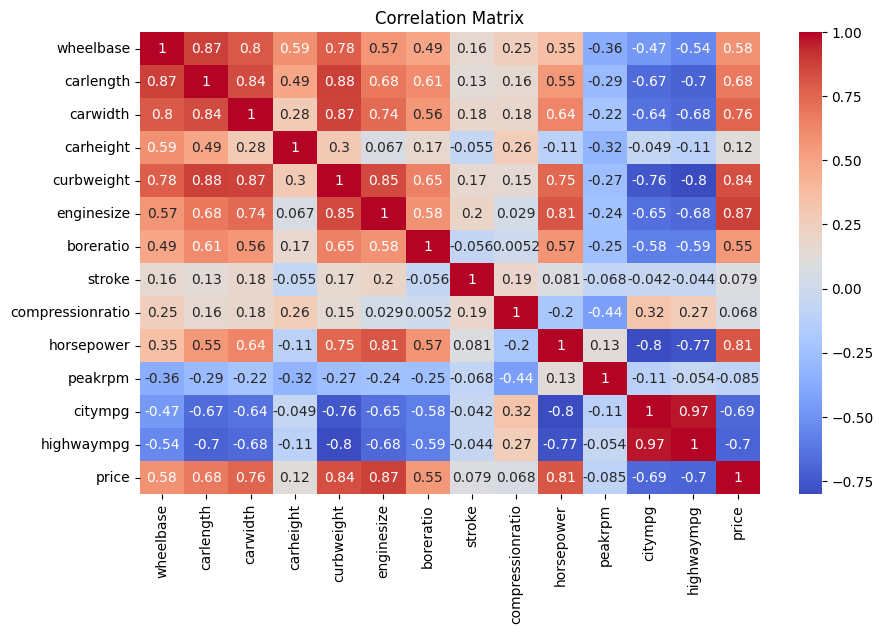

In [ ]:
# Multivariate Analysis
numeric_features = cars_df[numeric_cols]
numeric_features['price'] = cars_df['price']
corr_matrix = numeric_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

# **Data Preprocessing**

In [ ]:
# Categorical Features into numeric

#categorical features
categorical_features = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
# Convert categorical columns using Label Encoding (as they likely represent ordinal or binary categories)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    cars_df[col] = le.fit_transform(cars_df[col])

    label_encoders[col] = le  # Save the label encoder for each column if needed later

cars_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# as i am going to use Multiple regression, so apply min-max scaling on whole dataset (numeric & categorical features)
# split data into X & Y
X = cars_df.drop('price', axis=1)
y = cars_df['price']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# convert np array (X) back to pandas dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.333333,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
1,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.333333,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.6,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,...,0.500000,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.8,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,...,0.333333,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.8,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,...,0.166667,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


# **ML Modelling: Multiple Regression**

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7983838478445056

In [ ]:
# make predictions
y_preds = model.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_preds)
RMSE = root_mean_squared_error(y_test, y_preds)
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MSE: 15916389.72543959
RMSE: 3989.535026220423


**Checking for Linearity & homoscedasticity**

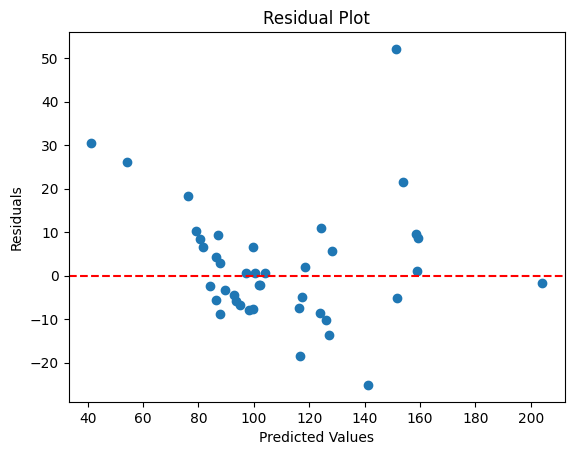

In [ ]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Insights**

**Linearity**

Though there is some randomness but a tilted V pattern is visible which suggests that linear model is not completely getting the relationship between dependent and independent variables.

**Homoscedasticity**

Variance of predicted values first decreses and then increases again which shows that variance of predicted values is not constant across the the range of predicted values. This suggests heteroscedasticity (non-constant variance), which means the model's residuals are not evenly distributed

In [ ]:


scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring=None)
scores

array([ 0.61061001,  0.86077085, -0.2783218 ,  0.62124101,  0.21861031])

In [ ]:
scores.mean()

0.40658207438108257

# **Ridge Regression**


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.7858053186616321

In [ ]:
# Tuning alpah

# For Ridge
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
print(f"Best alpha for Ridge: {ridge_cv.alpha_}")

Best alpha for Ridge: 0.1


In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
r_squared = ridge_model.score(X_test, y_test)
# make predictions
y_preds = ridge_model.predict(X_test)
print(f"R-Squared: {r_squared}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_preds)}")


R-Squared: 0.802536331575531
MSE: 15588575.963075085
RMSE: 3948.2370702726407


# **Lasso Regression**

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.8030701861813062

In [ ]:
# Tuning alpha for Lasso
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)  # Cross-validation with 5 folds
lasso_cv.fit(X_train, y_train)
print(f"Best alpha for Lasso: {lasso_cv.alpha_}")

Best alpha for Lasso: 10.0


In [ ]:
lasso_model = Lasso(alpha=10.0)
lasso_model.fit(X_train, y_train)
r_squared = lasso_model.score(X_test, y_test)
# make predictions
y_preds = lasso_model.predict(X_test)
print(f"R-Squared: {r_squared}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_preds)}")

R-Squared: 0.8101863688955551
MSE: 14984651.257152941
RMSE: 3871.0013248709874


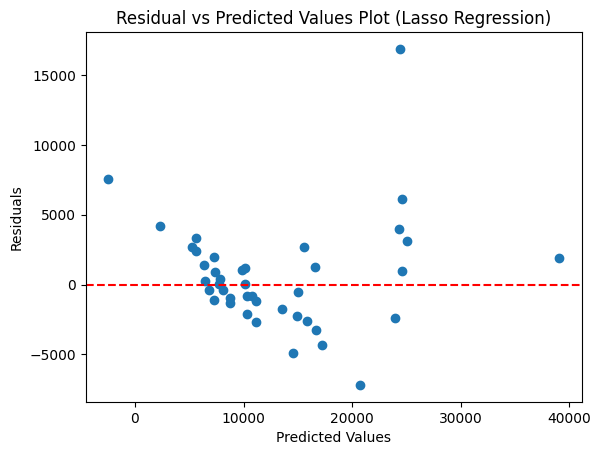

In [ ]:
y_preds = lasso_model.predict(X_test)
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted Values Plot (Lasso Regression)")
plt.show()

**RandomForrestRegressor**

# **ML Modeling after droping low correlated columns**

carheight, stroke, compressionratio, peakrpm


In [ ]:
X = X.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm'], axis=1)

**Multiple Linear Regression**

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)

# make predictions
y_preds = model.predict(X_test)

MSE = mean_squared_error(y_test, y_preds)
RMSE = root_mean_squared_error(y_test, y_preds)

print(f"R-Squared: {r_squared}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

R-Squared: 0.7983838478445056
MSE: 15916389.72543959
RMSE: 3989.535026220423


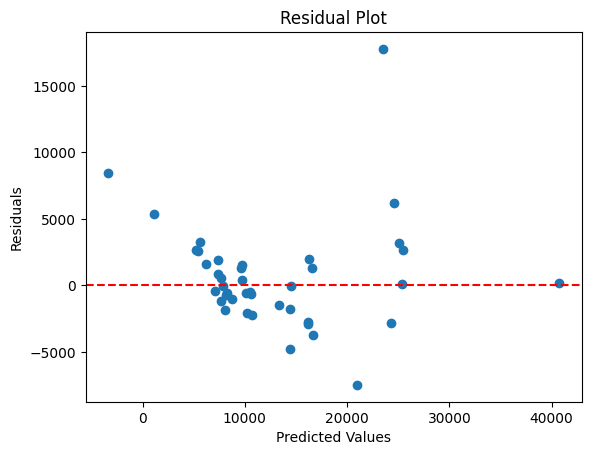

In [ ]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The plot between Residual and Predicted values shows that **heteroscedasticity** (non-constant variance in residuals) exists. So I will transform the Target column (price) by taking square root of it to improve the model so that it can capture the true relationships between predictors and target.



# **Multiple Regression After transforming the the Target Column**

In [ ]:
model = LinearRegression()
y_train = np.sqrt(y_train)
model.fit(X_train, y_train)
y_test = np.sqrt(y_test)
r_squared = model.score(X_test, y_test)

# make predictions
y_preds = model.predict(X_test)

MSE = mean_squared_error(y_test, y_preds)
RMSE = root_mean_squared_error(y_test, y_preds)

print(f"R-Squared: {r_squared}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

R-Squared: 0.8271530851367905
MSE: 186.2809072127542
RMSE: 13.648476369644861


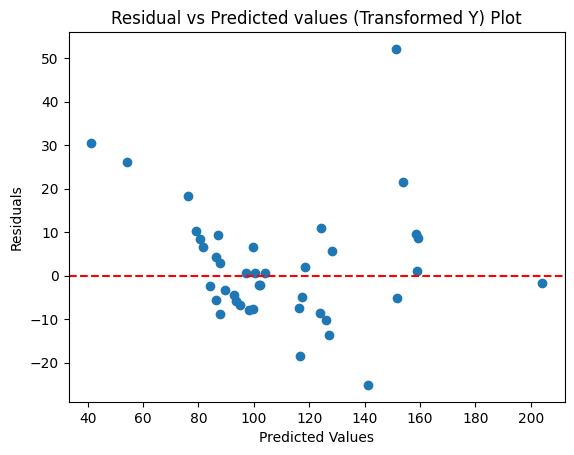

In [ ]:
# residual vs predictions
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted values (Transformed Y) Plot")
plt.show()

**Lasso**


In [ ]:
# Tuning alpha for Lasso
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 1.3, 2, 3, 10.0], cv=5)  # Cross-validation with 5 folds
lasso_cv.fit(X_train, y_train)
print(f"Best alpha for Lasso: {lasso_cv.alpha_}")

Best alpha for Lasso: 0.1


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
r_squared = lasso_model.score(X_test, y_test)
# make predictions
y_preds = lasso_model.predict(X_test)
print(f"R-Squared: {r_squared}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_preds)}")

R-Squared: 0.8454746357449575
MSE: 166.5353706983493
RMSE: 12.904858414502241


**Ridge Regression**

In [ ]:
# tuning alpha for ridge
ridge_cv = RidgeCV(alphas=[0.6,0.5,0.4,0.3,0.2, 0.1, 1.0, 1.3, 1.7, 2, 4, 10.0])
ridge_cv.fit(X_train, y_train)
print(f"Best alpha for Ridge: {ridge_cv.alpha_}")

Best alpha for Ridge: 0.5


In [ ]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
r_squared = ridge_model.score(X_test, y_test)
# make predictions
y_preds = ridge_model.predict(X_test)
print(f"R-Squared: {r_squared}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_preds)}")

R-Squared: 0.8333538071928561
MSE: 179.59825319551496
RMSE: 13.401427282029141


# **Report**


**Feature Selection**

Correlation Matrix map shows that **Stroke, CarHeight, Compression Ratio** and **Peak rpm** have very weak relationship with **Price** (less than 0.13). This behaviour can also be seen in regplot between these predictors vs Price. I trained the model with all features and also after droping non significant features, **R-squared** value of both models was same i.e **0.798**, which shows that Stroke, CarHeight, Compression Ratio and Peak rpm do not play role in predicting the price of car.

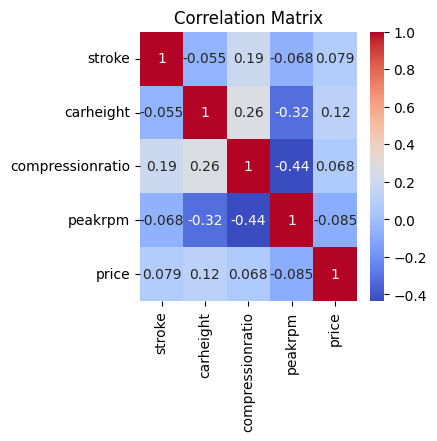

In [ ]:
non_sig_features = cars_df[["stroke", "carheight", "compressionratio", "peakrpm", "price"]]
corr_matrix = non_sig_features.corr()
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

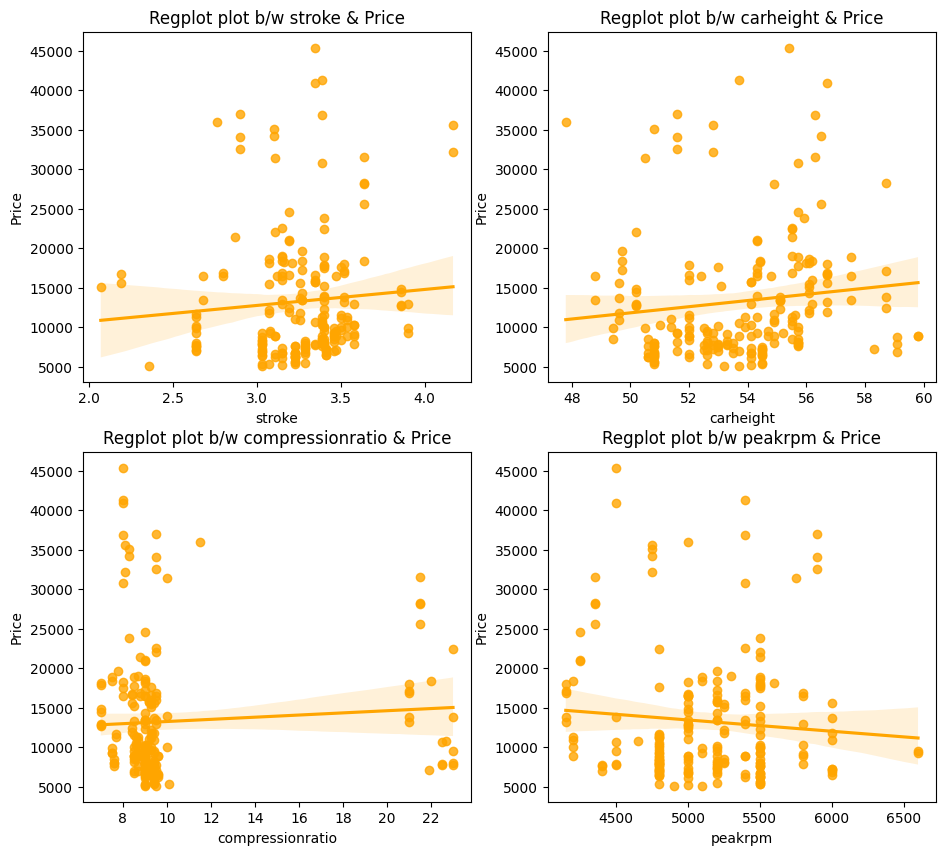

In [ ]:
features = ["stroke", "carheight", "compressionratio", "peakrpm"]
i = 0
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
for x in range(0,2):
  for y in range(0,2):
    sns.regplot(x=non_sig_features[features[i]], y=cars_df["price"], color='orange', ax=ax[x,y])
    ax[x,y].set(title=f"Regplot plot b/w {features[i]} & Price", xlabel=f"{features[i]}", ylabel="Price")
    i = i+1
plt.show();

**Multiple Linear Regression**

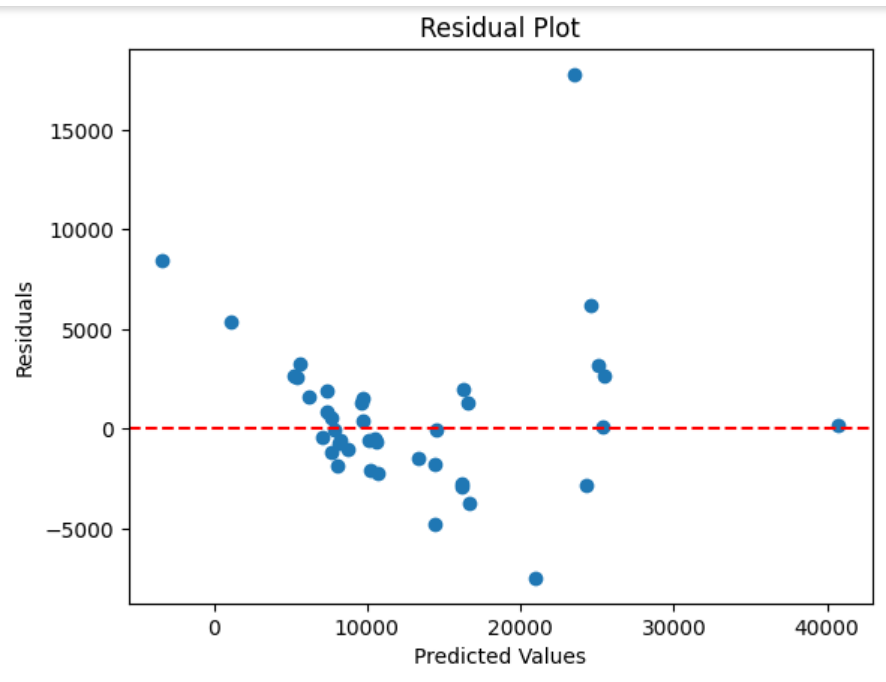

**Linearity**

Though there is some randomness but a tilted V pattern is visible which suggests that linear model is not completely getting the relationship between dependent and independent variables.

**Homoscedasticity**

Variance of predicted values first decreses and then increases again which shows that variance of predicted values is not constant across the the range of predicted values. This suggests heteroscedasticity (non-constant variance), which means the model's residuals are not evenly distributed

**Model Performanace**

                                        R-Squared          MSE            RMSE
                                        --------------------------------------
     Multiple Linear Regression |        0.798          15916389.7        3989.5
         Ridge Regression       |        0.80           15588575.96       3948.2
         Lasso Regression       |        0.81           14984651.25       3871

**After Performing sqrt transormation on Target(price)**

                                        R-Squared          MSE            RMSE
                                        --------------------------------------
     Multiple Linear Regression |        0.827           186.28           13.6
         Ridge Regression       |        0.83            179.59           13.4
         Lasso Regression       |        0.845           166.5            12.9



**Model Limitations**
1. Non-linearity of residuals shows that linear model is not capturing the underlying relationship between Preodictors and Price.
2. Some features (wheelbase, carlength, carwidth, curbweight, enginesize, horsepower) are highly correlated (=>0.8) with other features which also affect model's ability to capture underlying relationsip between Preodictors and Price.
3. After sqrt transformation of Target column (price), R-squared score incresed and MSE and RMSE descresed and it brought some randomness in the the residual vs predicted values plot but still tilted V like patterns is observed which shows non-linearity and hetroscedasticity

**Potential Improvements**
1. Using non-linear models (e.g., decision trees, random forests)
2. Collecting more data to improve model performance.
